<a href="https://colab.research.google.com/github/NoahLee99/ML-DL-studylog/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 효율적인 딥러닝을 위해서는 프로그램을 잘 짜는 것도 중요하지만,
<br> 딥러닝에 사용할 데이터를 모으는 것이 더 중요하다고 한다.
<br> 머신 러닝과 달리 딥러닝은 스스로 중요한 속성을 뽑아 학습하기에
<br> 비교적 많은 양의 데이터가 필요하다.

* 하지만 데이터가 충분하지 않은 상황에 직면한다면 어떨까?
<br> 이런 상황에서 전이 학습을 사용할 수 있다.

* **전이 학습(transfer learning)**이란 기존의 이미지에서
<br>학습한 정보를 가져와 내 프로젝트에 활용하는 것을 말한다.
<br> 방대한 자료를 통해 미리 학습한 가중치 값을 가져오는 것이다.


# 소규모 데이터셋으로 만드는 강력한 학습 모델

* 딥러닝을 이용한 프로젝트는 어떤 데이터를 가지고 있는지,
<br> 어떤 목적을 가지고 있는지 잘 살펴보는 것에서 시작한다.

* 내가 가진 데이터에 따라 딥러닝 알고리즘을 결정해야 하는데,
<br> 딥러닝 및 머신 러닝 알고리즘은 크게 두 가지 유형으로 나뉜다.

* 정답을 알려주고 시작하는가 아닌가에 따라 **지도 학습(supervised learning)** 방식과 <br> **비지도 학습(unsupervised learning)**으로 구분된다.

* 이번에 진행할 프로젝트는 MRI 뇌 사진으 보고 치매 환자의 뇌인지, 일반인의 뇌인지 예측하는 것이다.
<br> 각 사진마다 치매 혹은 일반인으로 클래스가 주어지므로 지도 학습의 예라고 할 수 있다.

* 이미지를 분류할 것이므로 대표적 알고리즘은 CNN을 선택해 진행하겠다.

* 데이터셋은 총 280장으로 이루어진 뇌의 단면 사진이다.
<br> 치매 환자의 특성을 보이는 뇌 사진 140장과 일반인의 것 140장으로 구성되어 있다.

* 케라스에서 제공하는 데이터를 로드하는 것이 아니라, 내 데이터를 읽어 오는 것이므로 <br> 데이터의 수를 늘리는 **ImageDataGenerator()** 함수와 폴더에 저장된 데이터를 불러오는 **flow_from_directory()** 함수를 사용하겠다.

* ImageDataGenerator() 함수는 주어진 데이터를 이용해 변형된 이미지를 만들어 훈련 세트에 포함시키는 편리한 기능이다.
<br> 이미지 데이터의 수를 확장할 때 효과적으로 사용 가능하다.

In [16]:
# 필요 라이브러리 호출
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 호출
!git clone https://github.com/taehojo/data-ch20.git

# 데이터 변형 후 훈련 세트에 추가
train_datagen = ImageDataGenerator(rescale=1./255,          # 주어진 이미지의 크기 설정 (모든 픽셀 값을 255로 나누어 0~1 사이의 값으로 정규화)
                                   horizontal_flip=True,    # 수평 대칭 이미지를 50% 확률로 만들어 추가
                                   width_shift_range=0.1,   # 전체 크기의 10% 범위에서 좌우로 이동
                                   height_shift_range=0.1,  # 전체 크기의 10% 범위에서 상하로 이동
                                   #rotation_range=5,       # 정해진 각도만큼 회전 (-5 ~ 5 사이의 랜덤 각도)
                                   #shear_range=0.7,        # 좌표 하나를 고정시키고 나머지를 이동
                                   #zoom_range=1.2,         # 정해진 범위 내에서 랜덤하게 확대 혹은 축소 (1 - zoom_range ~ 1 + zoom_range])
                                   #vertical_flip=True,     # 수직 대칭 이미지를 50% 확률로 만들어 추가
                                   #fill_mode='nearest'     # 이미지를 변형할 때 생기는 빈 공간을 채우는 방법을 설정 (nearest 옵션은 가장 비슷한 색으로 채움)
                                   )

# 이미지 로드
train_generator = train_datagen.flow_from_directory(
       './data-ch20/train',    # 훈련 세트가 있는 폴더 위치
       target_size=(150, 150),    # 이미지 크기
       batch_size=5,
       class_mode='binary')    # 치매 or 정상의 이진 분류이므로 바이너리 모드로 실행

# 테스트 세트 생성 (not 이미지 변형 )
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
       './data-ch20/test',   # 테스트 세트가 있는 폴더 위치
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

# CNN 모델 생성
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150,150,3))) # 컬러 이미지이므로 채널 수 3 (흑백은 1)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

fatal: destination path 'data-ch20' already exists and is not an empty directory.
Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 148, 148, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 72, 72, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       1,183,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,212,513 (4.63 MB)

 Trainable params: 1,212,513 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002),
              metrics=['accuracy'])

# 학습 조기 종료 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델 학습 실행
history = model.fit(
       train_generator,
       epochs=100,
       validation_data=test_generator,
       validation_steps=10,
       callbacks=[early_stopping_callback])

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.4898 - loss: 0.6981 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5133 - loss: 0.6994 - val_accuracy: 0.7400 - val_loss: 0.6851
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.4990 - loss: 0.6916 - val_accuracy: 0.5200 - val_loss: 0.6840
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5039 - loss: 0.6874 - val_accuracy: 0.4200 - val_loss: 0.6849
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5644 - loss: 0.6741 - val_accuracy: 0.6400 - val_loss: 0.6642
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5915 - loss: 0.6741 - val_accuracy: 0.6200 - val_loss: 0.6401
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6799 - loss: 0.6275 - val_accuracy: 0.5400 - val_loss: 0.6417
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6497 - loss: 0.6402 - val_accuracy: 0.

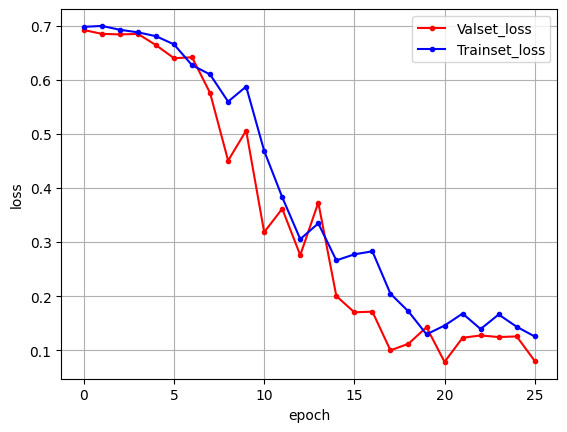

In [19]:
# 검증 세트와 학습 세트의 손실 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프 생성
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Valset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프 설정
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
# 그래프 출력 결과, 훈련 세트와 검증 세트 모두 높은 정확도를 보임!

# 전이 학습으로 모델 성능 극대화하기

* **전이 학습**은 앞서 언급한 대로 **기존의 학습 결과를 가져와 유사한 프로젝트에 사용하는 방법**을 의미한다.

* '이미지넷 이미지 인식 대회(ILSVRC)'에 사용되는 이미지넷(ImageNet) 데이터셋을 통해 전이 학습을 하고자 한다.

* 뇌 사진만 다루는 치매 분류기를 만드는데 뇌 사진과 관련 없는 이미지넷 학습 정보가 큰 역할을 하는 이유는 '형태'를 구분하는 학습이 되어 있기 때문이다.

* 대용량의 데이터를 이용해 학습한 **가중치 정보**를 가져와
<br> 내 모델에 적용한 후 프로젝트를 계속해서 진행할 수 있는 것이다.

* 전이 학습을 적용하는 방법은 다음과 같다.

* 먼저 대규모 데이터셋에서 학습된 기존의 네트워크를 불러온다.
<br> CNN 모델의 앞쪽을 이 네트워크로 채운다.
<br> 그리고 뒤쪽 레이어에서 내 프로젝트와 연결한다.
<br> 그 다음 이 두 네트워크가 잘 맞물리게끔 **미세 조정(fine tuning)**을 한다.

* 이미지넷 데이터셋에서 이미 학습된 VGGNet 모델을 가지고 전이 학습을 진행해 보자.

In [20]:
# 라이브러리 호출
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# VGG16 모델 호출
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable = False # 이미 학습된 것이기에 추가 학습 x
transfer_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [21]:
# 나의 로컬 모델 생성
finetune_model = models.Sequential()

finetune_model.add(transfer_model) # VGG16 모델 그대로 사용
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))

finetune_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         524,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,239,105 (58.13 MB)

 Trainable params: 524,417 (2.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
# 훈련 세트의 변형 설정 (정규화)
train_datagen = ImageDataGenerator(rescale=1./255,          # 주어진 이미지의 크기 설정
                                  horizontal_flip=True,     # 수평 대칭 이미지를 50% 확률로 만들어 추가
                                  width_shift_range=0.1,    #  좌우로 이동
                                  height_shift_range=0.1,   # 전체 크기의 10% 범위에서 상하로 이동합니다.
                                  #rotation_range=5,        # 정해진 각도만큼 회전
                                  #shear_range=0.7,         # 좌표 하나를 고정 후 나머지를 이동
                                  #zoom_range=1.2,          # 확대 또는 축소
                                  #vertical_flip=True,      # 수직 대칭 이미지를 50% 확률로 만들어 추가
                                  #fill_mode='nearest'      # 변형하면서 생기는 빈 공간을 채우는 방법 (nearest 옵션은 가장 비슷한 색으로)
                                  )


train_generator = train_datagen.flow_from_directory(
       './data-ch20/train',
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

# 테스트 세트의 변형 설정
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
       './data-ch20/test',
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [24]:
# 모델 컴파일
finetune_model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002),   # 학습률 지정
                       metrics=['accuracy'])

# 학습 조기 종료 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델 학습 실행
history = finetune_model.fit(
       train_generator,
       epochs=20,
       validation_data=test_generator,
       validation_steps=10,
       callbacks=[early_stopping_callback])

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.5950 - loss: 0.7598 - val_accuracy: 0.8600 - val_loss: 0.4308
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.7318 - loss: 0.4849 - val_accuracy: 0.8000 - val_loss: 0.4916
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.8129 - loss: 0.4282 - val_accuracy: 0.8800 - val_loss: 0.3187
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.8877 - loss: 0.2830 - val_accuracy: 0.9400 - val_loss: 0.2013
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.8896 - loss: 0.3410 - val_accuracy: 0.8600 - val_loss: 0.3127
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9002 - loss: 0.2966 - val_accuracy: 0.9400 - val_loss: 0.2334
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.8953 - loss: 0.2492 - val_accuracy: 0.9600 - val_loss: 0.1391
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.9331 - loss: 0.1923 - val_accuracy: 0.8800 - v

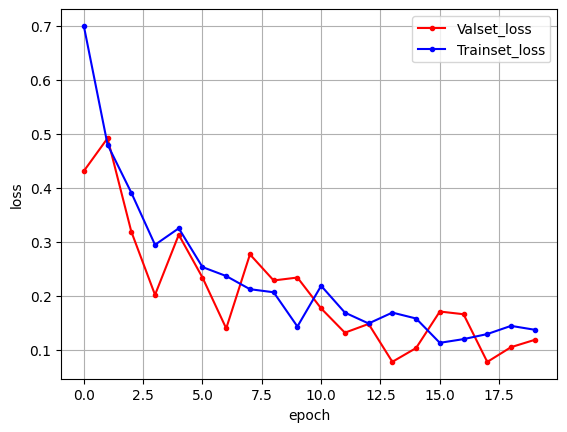

In [25]:
# 검증 세트와 학습 세트의 손실 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프 생성
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Valset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프 설정
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 전이 학습을 사용하지 않았던 때보다 더 높은 정확도로 출발하며, 학습 속도도 빨라졌으며 그래프가 안정적이다!